In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Tit_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
pip install lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
# Drop unnecessary columns
df = df.drop(['Survived'], axis=1)


In [77]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [78]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [79]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [80]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

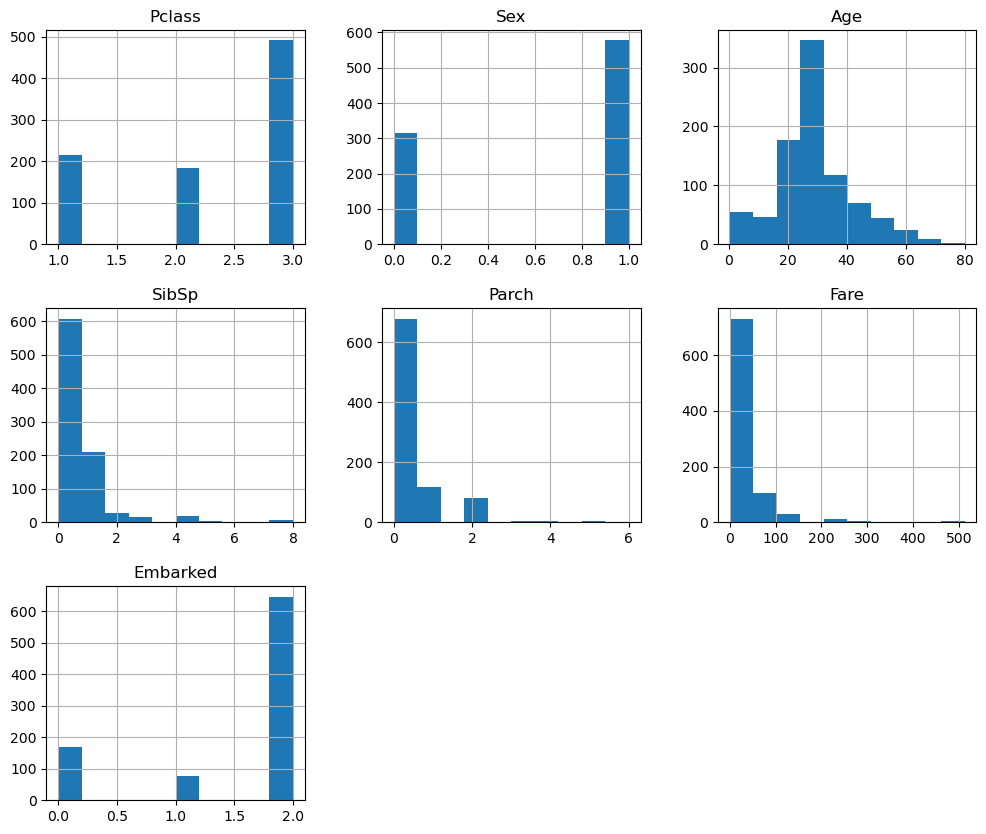

In [81]:
# Histograms
df.hist(figsize=(12, 10))
plt.show()

In [82]:
df[['Age', 'Fare']].isnull().sum()

Age     0
Fare    0
dtype: int64

In [29]:
pip install --upgrade seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 327.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 386.4 kB/s eta 0:00:01
   ------------------ -------------

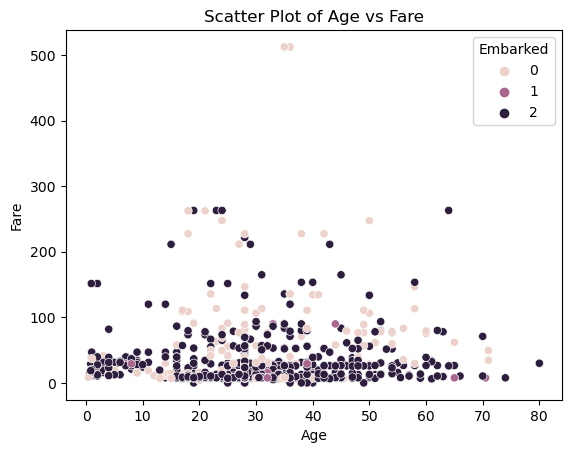

In [83]:
# Scatter plots
sns.scatterplot(x='Age', y='Fare', hue='Embarked', data=df)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Embarked')
plt.show()

In [84]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [85]:
# Define features and target
X = df.drop('Embarked', axis=1)
y = df['Embarked']

In [86]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [87]:
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [88]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
#Build and Train Models
# Initialize models
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

In [91]:
# Train models
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] Start training from score -1.739764
[LightGBM] [Info] Start training from score -2.473733
[LightGBM] [Info] Start training from score -0.300877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [92]:
# Predict
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [93]:
lgb_pred 
xgb_pred 

array([0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [96]:
# Evaluate Model Performance
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred, average='macro')
lgb_recall = recall_score(y_test, lgb_pred, average='macro')
lgb_f1 = f1_score(y_test, lgb_pred, average='macro')

In [98]:
print(f'Accuracy: {lgb_accuracy}')
print(f'Precision: {lgb_precision}')
print(f'Recall: {lgb_recall}')
print(f'F1 Score: {lgb_f1}')

Accuracy: 0.7988826815642458
Precision: 0.7801197458455523
Recall: 0.7279656048465898
F1 Score: 0.7476770504658953


In [99]:
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='macro')
xgb_recall = recall_score(y_test, xgb_pred, average='macro')
xgb_f1 = f1_score(y_test, xgb_pred, average='macro')

In [100]:
print(f'Accuracy: {xgb_accuracy}')
print(f'Precision: {xgb_precision}')
print(f'Recall: {xgb_recall}')
print(f'F1 Score: {xgb_f1}')

Accuracy: 0.8379888268156425
Precision: 0.8461357008063132
Recall: 0.774281805745554
F1 Score: 0.800175669740887


In [101]:
print(f'LightGBM - Accuracy: {lgb_accuracy:.4f}, Precision: {lgb_precision:.4f}, Recall: {lgb_recall:.4f}, F1: {lgb_f1:.4f}')
print(f'XGBoost - Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1: {xgb_f1:.4f}')

LightGBM - Accuracy: 0.7989, Precision: 0.7801, Recall: 0.7280, F1: 0.7477
XGBoost - Accuracy: 0.8380, Precision: 0.8461, Recall: 0.7743, F1: 0.8002


In [102]:
# Comparative Analysis
# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
lgb_scores = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

<BarContainer object of 4 artists>

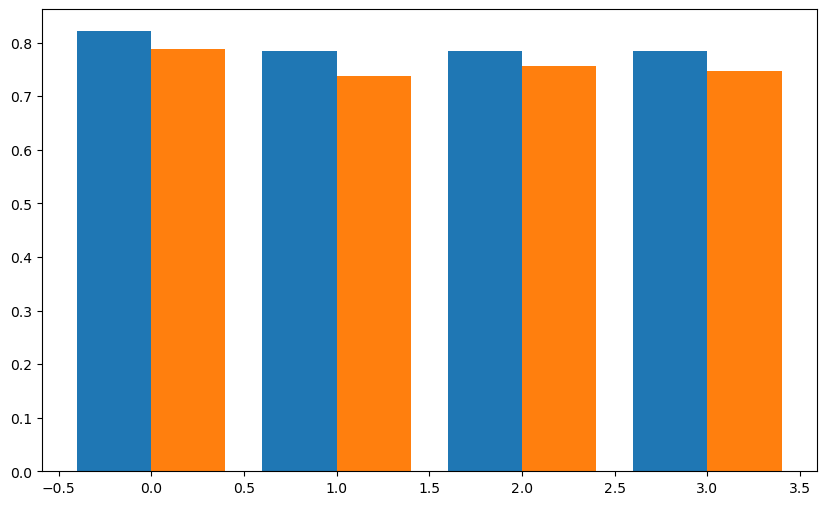

In [46]:
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lgb_scores, 0.4, label='LightGBM')
plt.bar(x + 0.2, xgb_scores, 0.4, label='XGBoost')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


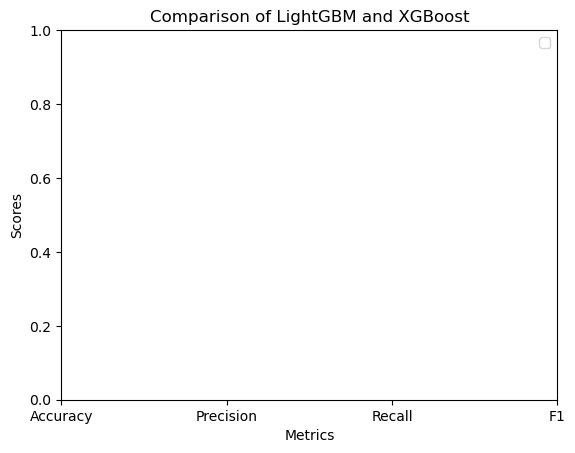

In [103]:
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of LightGBM and XGBoost')
plt.xticks(x, metrics)
plt.legend()
plt.show()

In [104]:
#Optional: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [105]:
# Example for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [20, 40]
}

In [107]:
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)

Best parameters for LightGBM: {'learning_rate': 0.05, 'n_estimators': 40, 'num_leaves': 31}


In [108]:
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 6
[LightGBM] [Info] Start training from score -1.738710
[LightGBM] [Info] Start training from score -2.472679
[LightGBM] [Info] Start training from score -0.301248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1], 'n_estimators': [20, 40],
                         'num_leaves': [31, 50]})

In [109]:
# Example for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100]
}

In [110]:
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]})

In [111]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [112]:
df1=pd.read_csv('Tit_test.csv')

In [114]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [115]:
# Drop unnecessary columns
df1 = df1.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)


In [116]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [117]:
# Encode categorical variables
label_encoder = LabelEncoder()
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])

In [118]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [128]:
# New input data
input_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['1'],
    'Age': [34.5],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.8292]
})

In [129]:
# Original training data columns for reference
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [130]:
# Ensure the input data has the same columns as the training data
input_data = input_data[columns]

In [131]:
import joblib

In [132]:
# Encoding categorical variables in the input data
label_encoders = {'Sex': LabelEncoder(), 'Embarked': LabelEncoder()}
input_data['Sex'] = label_encoders['Sex'].fit_transform(input_data['Sex'])


In [133]:
# Scaling numerical features in the input data
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
input_data[numerical_features] = scaler.fit_transform(input_data[numerical_features])

In [134]:
# Make predictions with LightGBM
lgb_pred = lgb_model.predict(input_data)

# Make predictions with XGBoost
xgb_pred = xgb_model.predict(input_data)

In [135]:
print(f"LightGBM Prediction: {lgb_pred[0]}")
print(f"XGBoost Prediction: {xgb_pred[0]}")

LightGBM Prediction: 2
XGBoost Prediction: 2
